In [4]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt

from extract.jobs import extract_jobs, get_baseline

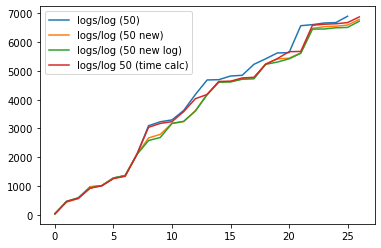

In [5]:
# Data classes can easily be transformed to a pandas DataFrame https://github.com/lithomas1/pandas/commit/6f4bd24c598656e2ab1002ce981a4f2d36b4b84b
logdirs = ["logs/log (50)", "logs/log (50 new)", "logs/log (50 new log)", "logs/log 50 (time calc)"]

for logdir in logdirs:

    # Extract -> to list -> to DataFrame
    jobs_dict = extract_jobs(logdir)
    jobs_list = list(jobs_dict.values())
    job_df = pd.DataFrame(jobs_list)

    # Filter UNKNOWN
    solved = job_df[job_df.result != "UNKNOWN"]

    # Plot end_time of solved formulas
    solved.sort_values(by=['end_time']).reset_index().end_time.rename(logdir).plot(legend=True)

solved_by
Both             25
No one           16
Only baseline     7
Only mallob       2
Name: identifier, dtype: int64


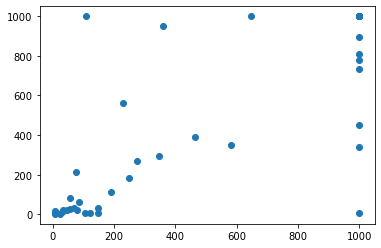

In [6]:
baseline = get_baseline()
baseline_df = pd.DataFrame(baseline)
baseline_durations = baseline_df.head(50).duration

mallob_dict = extract_jobs("logs/log (50 new log)")
mallob_list = list(mallob_dict.values())
mallob_df = pd.DataFrame(mallob_list)
mallob_durations = mallob_df.duration

# Test if ids match
plt.scatter(x=mallob_durations, y=baseline_durations)

merge_df = pd.merge(baseline_df, mallob_df.head(50), on="identifier")
merge_df["solved_by"] = merge_df.apply(lambda row: ("Both" if (row["result_y"] != "UNKNOWN") else "Only baseline") if (row["result_x"] != "UNKNOWN") else ("Only mallob" if (row["result_y"] != "UNKNOWN") else "No one"), axis = 1) 

print(merge_df.groupby("solved_by").identifier.nunique())